## **Import Packages**

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, auc, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lime
import lime.lime_tabular
import shap

In [6]:
path = "D:/Tilburg_Master/Internships/diabetes_data_upload.csv"
df = pd.read_csv(path)

print('The first 5 patients:')
df.head()

The first 5 patients:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
print('The last 5 patients:')
df.tail()

The last 5 patients:


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


## **Exploratory Data Analysis**

In [10]:
print('The shape is:', df.shape)
print('Information about the dataset:', df.info()) #There are no missing values -> NO DATA CLEANING!

The shape is: (520, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  cl

In [11]:
# Descriptive Statistics
df.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Conclusion:** 
1. All variables apart from 'Age' are categorical and binary.
2. There are more males than females in the dataset (i.e., 328 males and 192 females, can lead to biased model for gender).
3. The average participant age is 48, with 16 being the youngest and 98 being the oldest. The standard deviation of 12.15 years is significant, meaning that there are many individuals who are much younger or older than this average.


### **Visualizations**

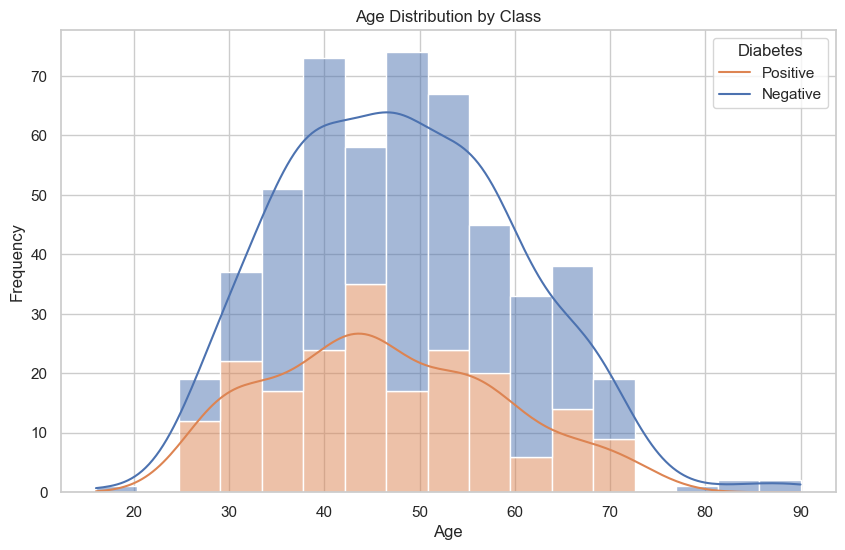

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='class', kde=True, multiple='stack')
plt.title('Age Distribution by Class')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Diabetes', labels=['Positive', 'Negative'])
plt.show()

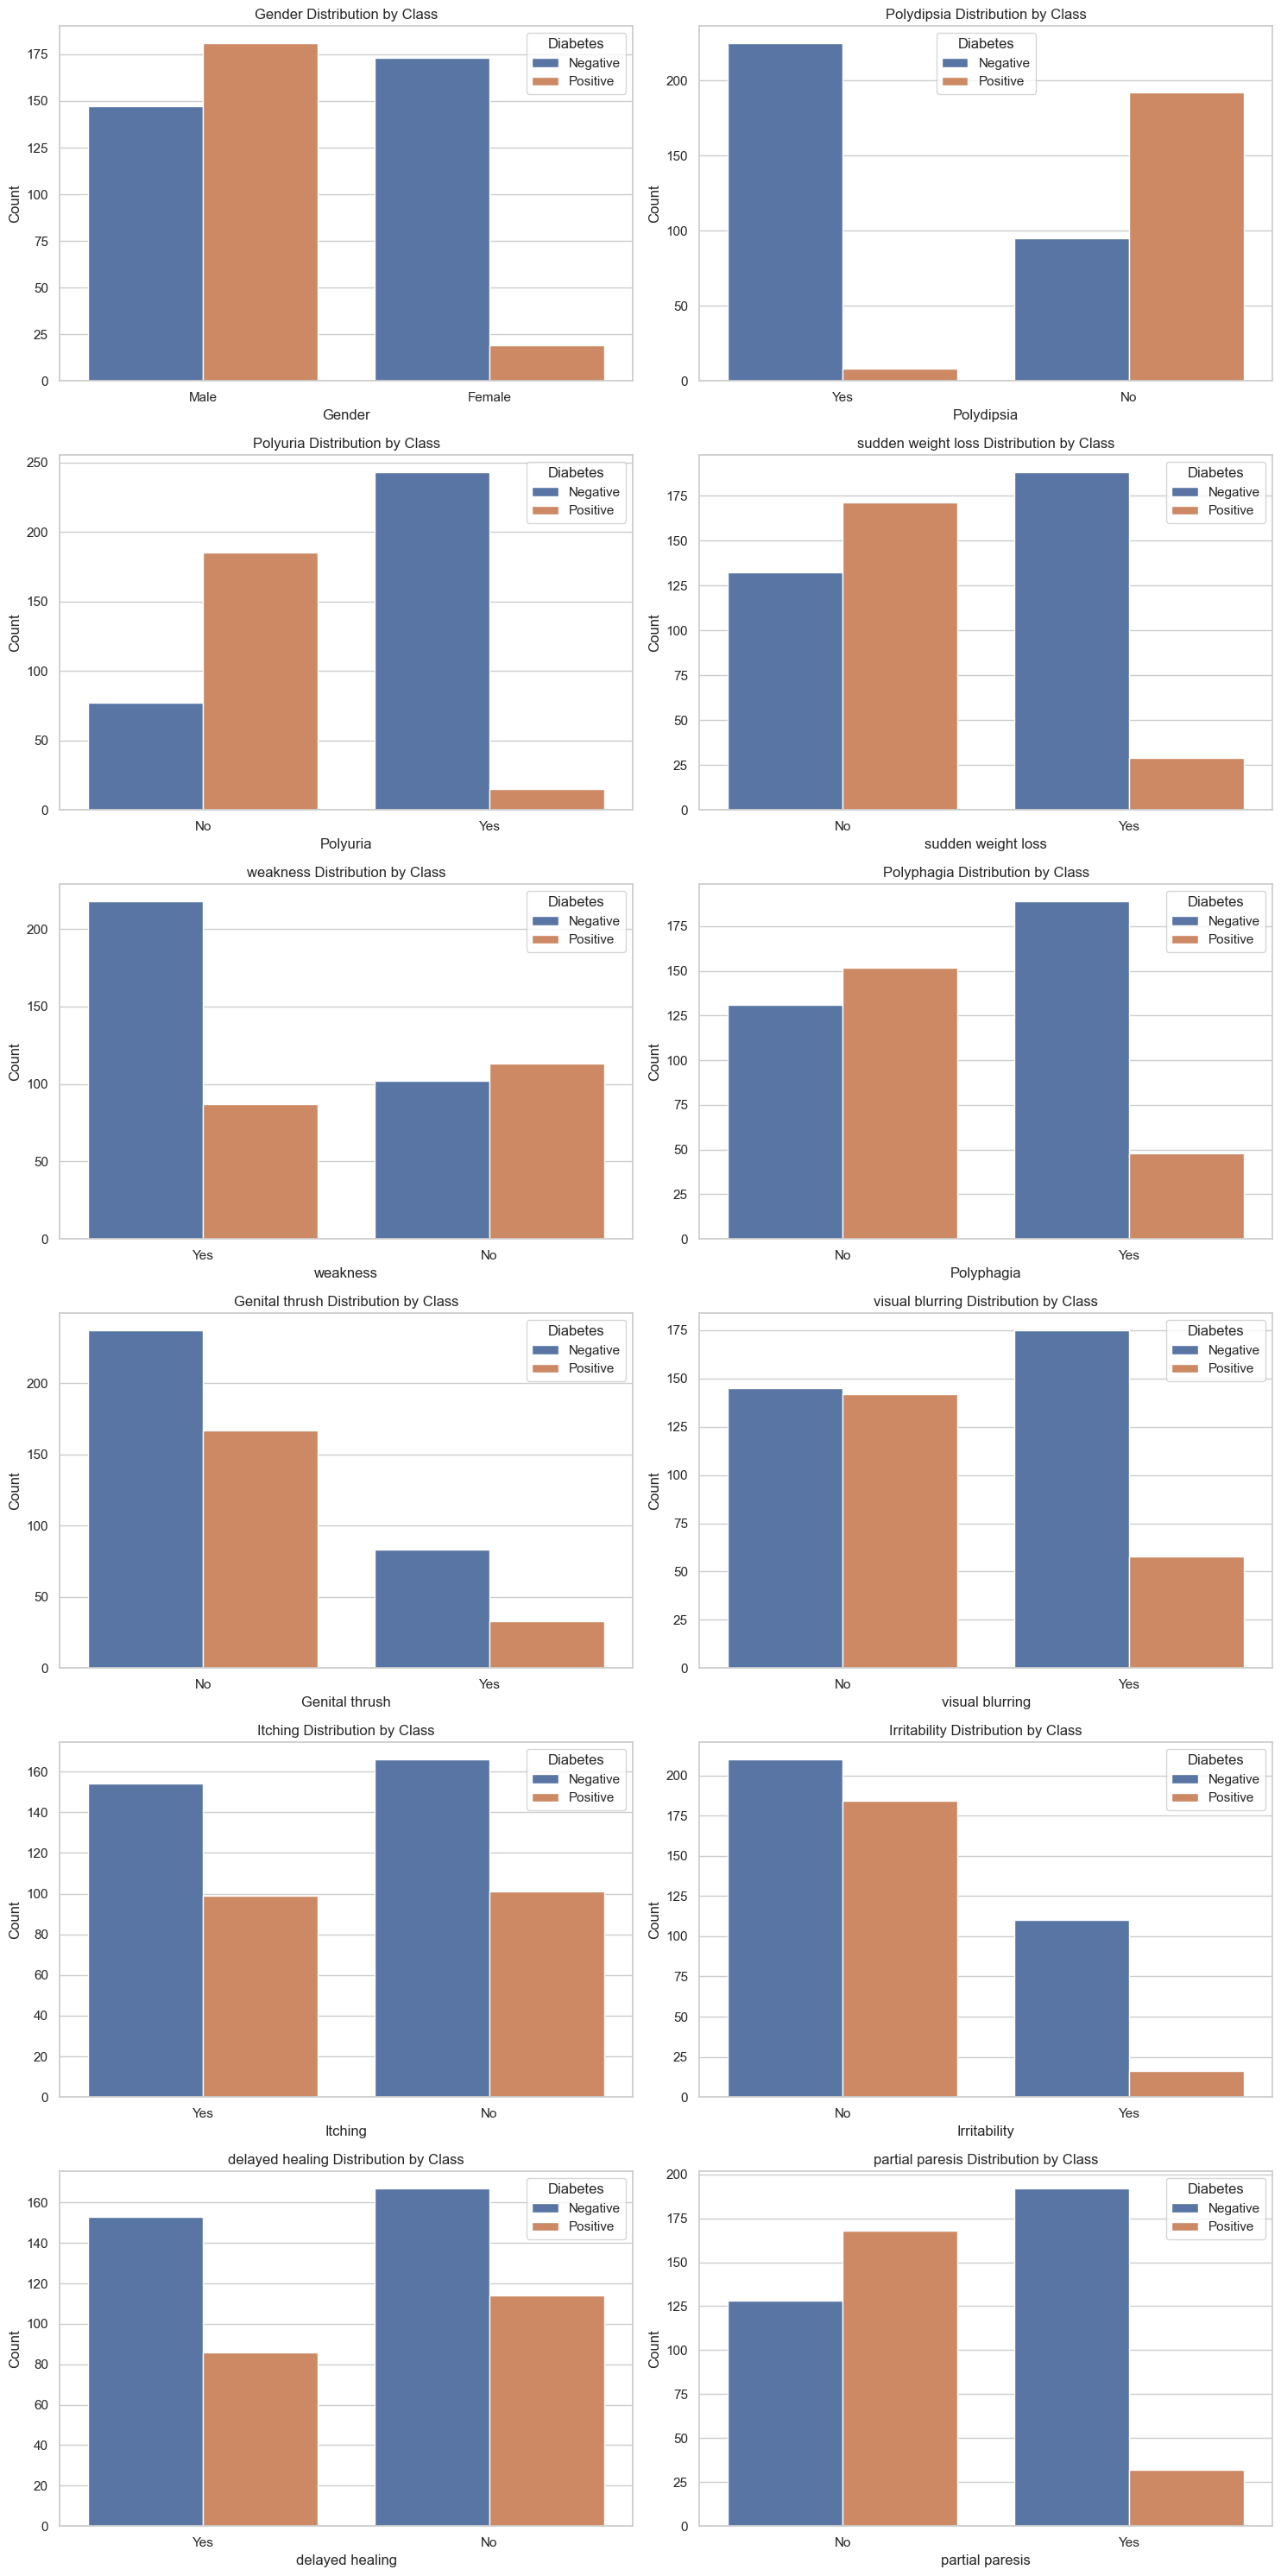

In [22]:
# Symptoms list (reduced to 12 symptoms)
symptoms = ['Gender', 'Polydipsia', 'Polyuria', 'sudden weight loss', 'weakness', 'Polyphagia', 
            'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis']

# Plotting each symptom
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))
axes = axes.flatten()

for i, symptom in enumerate(symptoms):
    sns.countplot(data=df, x=symptom, hue='class', ax=axes[i])
    axes[i].set_title(f'{symptom} Distribution by Class')
    axes[i].set_xlabel(symptom)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Diabetes', labels=['Negative', 'Positive'])

plt.tight_layout()
plt.show()


**Conclusion:**
1. Age, Gender, Polydipsia, Polyuna, higher weights show clear class difference between positive and negative diabetes diagnoses. -> Likely features for predicting early diabetes. 
2. Train a random forest model to properly evaluate feature importance of each variable.


## **Pre-Processing**

In [107]:
# One-hot Encoding
from sklearn.preprocessing import LabelEncoder
diabetes_data_numeric = df.copy()

# List of categorical variables
categorical_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 
                       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 
                       'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 
                       'Alopecia', 'Obesity']


for column in categorical_columns:
    diabetes_data_numeric[column] = LabelEncoder().fit_transform(diabetes_data_numeric[column])

gender = {
    "Female":0,
    "Male":1
}

diabetes_data_numeric['Gender'] =  diabetes_data_numeric['Gender'].map(gender)

# Remove DV from the IV dataset
X = diabetes_data_numeric.drop('class',axis=1)
y = diabetes_data_numeric['class']
y_encoded = LabelEncoder().fit_transform(y_reduced)

# Standardize numerical values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,-0.661367,0.765092,-0.992337,1.109847,-0.846269,0.839594,-0.915126,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,2.215647
1,0.821362,0.765092,-0.992337,-0.901025,-0.846269,0.839594,-0.915126,-0.535844,1.109847,-0.973430,-0.565506,-0.922244,1.149534,-0.774597,1.380227,-0.451335
2,-0.578993,0.765092,1.007722,-0.901025,-0.846269,0.839594,1.092746,-0.535844,-0.901025,1.027295,-0.565506,1.084312,-0.869918,1.290994,1.380227,-0.451335
3,-0.249498,0.765092,-0.992337,-0.901025,1.181657,0.839594,1.092746,1.866215,-0.901025,1.027295,-0.565506,1.084312,-0.869918,-0.774597,-0.724518,-0.451335
4,0.986110,0.765092,1.007722,1.109847,1.181657,0.839594,1.092746,-0.535844,1.109847,1.027295,1.768328,1.084312,1.149534,1.290994,1.380227,2.215647


## **Split Dataset**

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size = 0.2, stratify=y, random_state = 42)

## **Model Building**

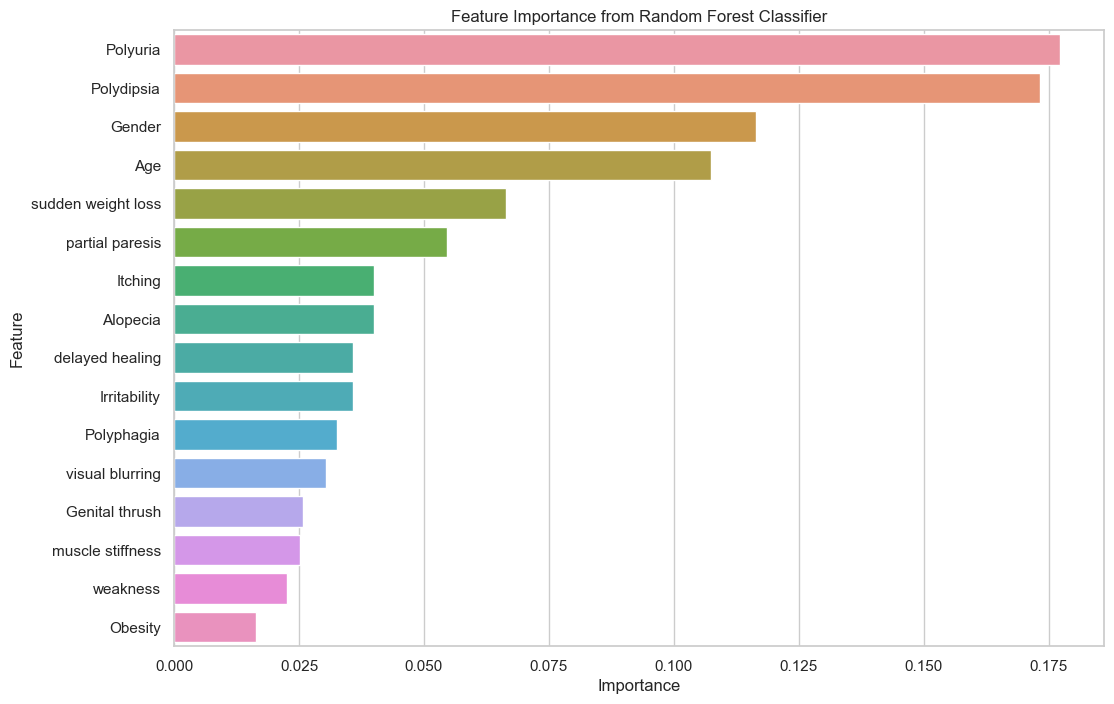

,Feature,Importance
2,Polyuria,0.177244
3,Polydipsia,0.173301
1,Gender,0.116507
0,Age,0.107436
4,sudden weight loss,0.066379
12,partial paresis,0.054524
9,Itching,0.040077
14,Alopecia,0.039936
11,delayed healing,0.035742
10,Irritability,0.035730


In [109]:
# Step 2: Model Training
rf_model = RandomForestClassifier(n_estimators=100, random_state=10)
rf_model.fit(X_train, y_train)

# Step 3: Feature Importance Extraction
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

importance_df

**Conclusion:**
Polyuria, Polydipsia, Gender, and Age explain the most variability in predicting diabetes.

## **Predict diabetes with other models**

In [110]:
models = {
    "Support Vector": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Bagging": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "MLP": MLPClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    if name != 'Random Forest':
        model.fit(X_train, y_train)
        print(f"{name} : {model.score(X_test, y_test)}")
    else:
        model.fit(X_train, y_train)  # Fit the Random Forest model
        print('\nComparison with Random Forest\n')
        print(f"{name} : {model.score(X_test, y_test)}")


Support Vector : 0.9807692307692307
Decision Tree : 0.9711538461538461
AdaBoost : 0.9519230769230769
Bagging : 0.9807692307692307
Gradient Boosting : 0.9903846153846154


C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP : 0.9807692307692307
XGBoost : 0.9807692307692307

Comparison with Random Forest

Random Forest : 0.9903846153846154


**Conclusion**:
Gradient Boosting and Random Forests show the best performance for accuracy. Evaluate these two models more to gain clarity.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Gradient Boosting : 0.9903846153846154
Random Forest : 0.9807692307692307
Gradient Boosting :
Accuracy: 0.9903846153846154
F1 Score: 0.9904061137656939
Recall: 0.9903846153846154
Precision: 0.9906191369606004


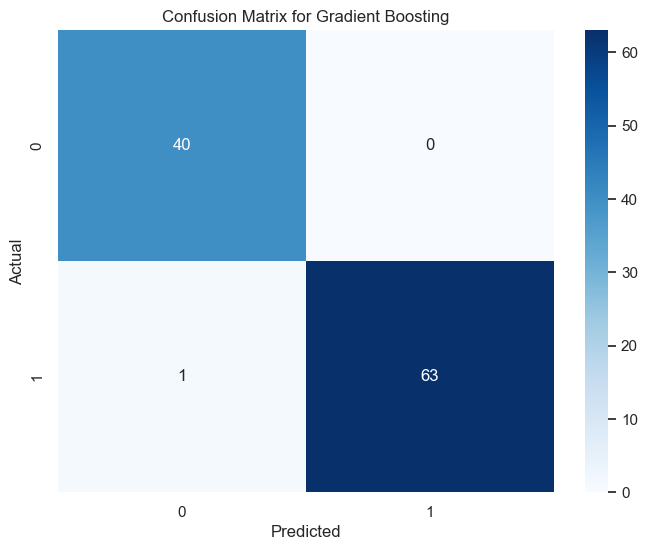

Random Forest :
Accuracy: 0.9807692307692307
F1 Score: 0.9808511271925906
Recall: 0.9807692307692307
Precision: 0.9816849816849818


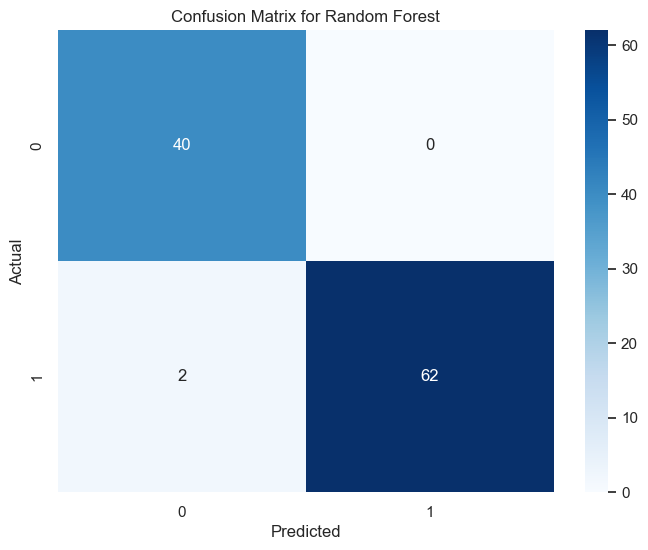

In [118]:
# Fit the models
for name, model in models.items():
    model.fit(X_train, y_train)

# Evaluate the models and calculate scores
for name, model in models.items():
    if name in ['Gradient Boosting', 'Random Forest']:
        print(f"{name} : {model.score(X_test, y_test)}")

for name, model in models.items():
    if name in ['Gradient Boosting', 'Random Forest']:
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')

        print(f"{name} :")
        print(f"Accuracy: {accuracy}")
        print(f"F1 Score: {f1}")
        print(f"Recall: {recall}")
        print(f"Precision: {precision}")

        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()       

**Conclusion:**
Borh models exhibit the same model performance when used to predict positive diabetic diagnoses. 
Given their identical performance, and the characteristics for each model, I would choose Random Forest as the optimal
model for this task, due to its interpretability.